In [5]:
import pandas as pd
import datetime as dt

# read data Active-Losses
df_losses = pd.read_csv('../../data/Avtice-losses.csv', header=1, parse_dates=['Zeitstempel'])

# shift Zeitstempel by 15min
df_losses['Zeitstempel'] = df_losses['Zeitstempel'] - dt.timedelta(minutes=15)

# calculate average for daylight saving time in Octobers
df_losses = df_losses.groupby(['Zeitstempel'], as_index=False)['kWh'].mean()

# resample PT15M to PT1H
df_losses_1H = df_losses.resample('H', on='Zeitstempel').sum().reset_index()

# convet kWh to MWh and rename column
df_losses_1H['kWh'] = df_losses_1H['kWh']/1000
df_losses_1H = df_losses_1H.rename(columns={'kWh':'MWh'})

df_losses_1H

,Zeitstempel,MWh
0,2019-01-01 00:00:00,139.525004
1,2019-01-01 01:00:00,129.716036
2,2019-01-01 02:00:00,133.398074
3,2019-01-01 03:00:00,135.133852
4,2019-01-01 04:00:00,131.699424
...,...,...
26299,2021-12-31 19:00:00,171.707318
26300,2021-12-31 20:00:00,159.462903
26301,2021-12-31 21:00:00,155.109520
26302,2021-12-31 22:00:00,171.370277


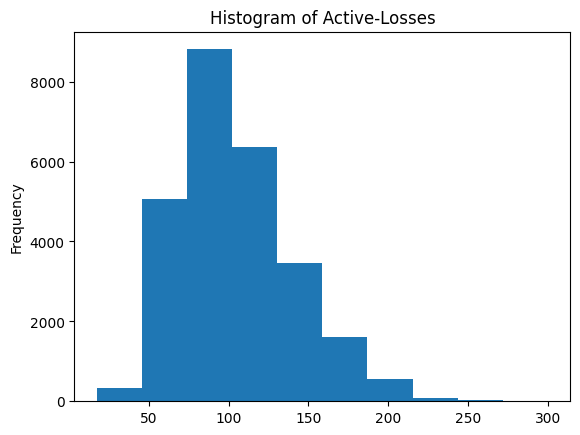

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot Active-Losses
df_losses_1H['MWh'].plot.hist()
plt.title('Histogram of Active-Losses')
plt.show()

In [28]:
# read data Forcecat-renewable-generation
df_renew = pd.read_csv('../../data/Forecast-renewable-generation.csv', header=0, parse_dates=['datetime'])

df_renew

,datetime,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW]
0,2019-01-01 00:00:00,0.0,0.0,21344.8514,4302.6977
1,2019-01-01 01:00:00,0.0,0.0,23052.3310,4596.5916
2,2019-01-01 02:00:00,0.0,0.0,24969.9701,4478.5564
3,2019-01-01 03:00:00,0.0,0.0,27082.9626,4323.3712
4,2019-01-01 04:00:00,0.0,0.0,26890.9717,4231.8283
...,...,...,...,...,...
26299,2021-12-31 19:00:00,0.0,0.0,36997.7200,1108.4000
26300,2021-12-31 20:00:00,0.0,0.0,35666.9300,1077.9700
26301,2021-12-31 21:00:00,0.0,0.0,34383.8800,1048.2800
26302,2021-12-31 22:00:00,0.0,0.0,33075.2500,1078.7800


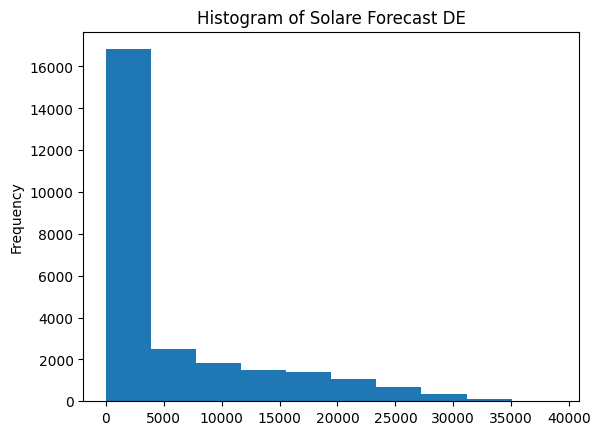

In [31]:
# plot Active-Losses
df_renew['solar_fore_de [MW]'].plot.hist()
plt.title('Histogram of Solare Forecast DE')
plt.show()

In [29]:
# read data NTCs
df_ntc = pd.read_csv('../../data/NTC.csv', header=0, parse_dates=['datetime'])

df_ntc

,datetime,CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH,IT_CH
0,2019-01-01 00:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
1,2019-01-01 01:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2,2019-01-01 02:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
3,2019-01-01 03:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
4,2019-01-01 04:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
...,...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
26300,2021-12-31 20:00:00,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
26301,2021-12-31 21:00:00,1200.0,4000.0,1400.0,3953.0,1200.0,800.0,3200.0,1810.0
26302,2021-12-31 22:00:00,1200.0,4000.0,1400.0,3780.0,1200.0,800.0,3200.0,1810.0


In [50]:
# get day, weekday and month
df_losses_1H['weekday'] = df_losses_1H['Zeitstempel'].dt.day_name()
df_losses_1H['day'] = df_losses_1H['Zeitstempel'].dt.day
df_losses_1H['month'] = df_losses_1H['Zeitstempel'].dt.month_name()

df_losses_1H

,Zeitstempel,MWh,weekday,month,day
0,2019-01-01 00:00:00,139.525004,Tuesday,January,1
1,2019-01-01 01:00:00,129.716036,Tuesday,January,1
2,2019-01-01 02:00:00,133.398074,Tuesday,January,1
3,2019-01-01 03:00:00,135.133852,Tuesday,January,1
4,2019-01-01 04:00:00,131.699424,Tuesday,January,1
...,...,...,...,...,...
26227,2021-12-28 19:00:00,156.097311,Tuesday,December,28
26228,2021-12-28 20:00:00,154.555531,Tuesday,December,28
26229,2021-12-28 21:00:00,155.129980,Tuesday,December,28
26230,2021-12-28 22:00:00,152.027250,Tuesday,December,28


In [55]:
# group dataframe by day, weekday and month
df_losses_group = df_losses_1H.groupby(['weekday', 'month', 'day'], as_index=False)['MWh'].mean()
df_losses_group

,weekday,month,day,MWh
0,Tuesday,April,2,91.153527
1,Tuesday,April,6,76.600123
2,Tuesday,April,7,75.811395
3,Tuesday,April,9,101.664805
4,Tuesday,April,13,71.336180
...,...,...,...,...
152,Tuesday,September,21,67.389402
153,Tuesday,September,22,71.870675
154,Tuesday,September,24,100.982115
155,Tuesday,September,28,82.984304


/opt/tljh/user/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


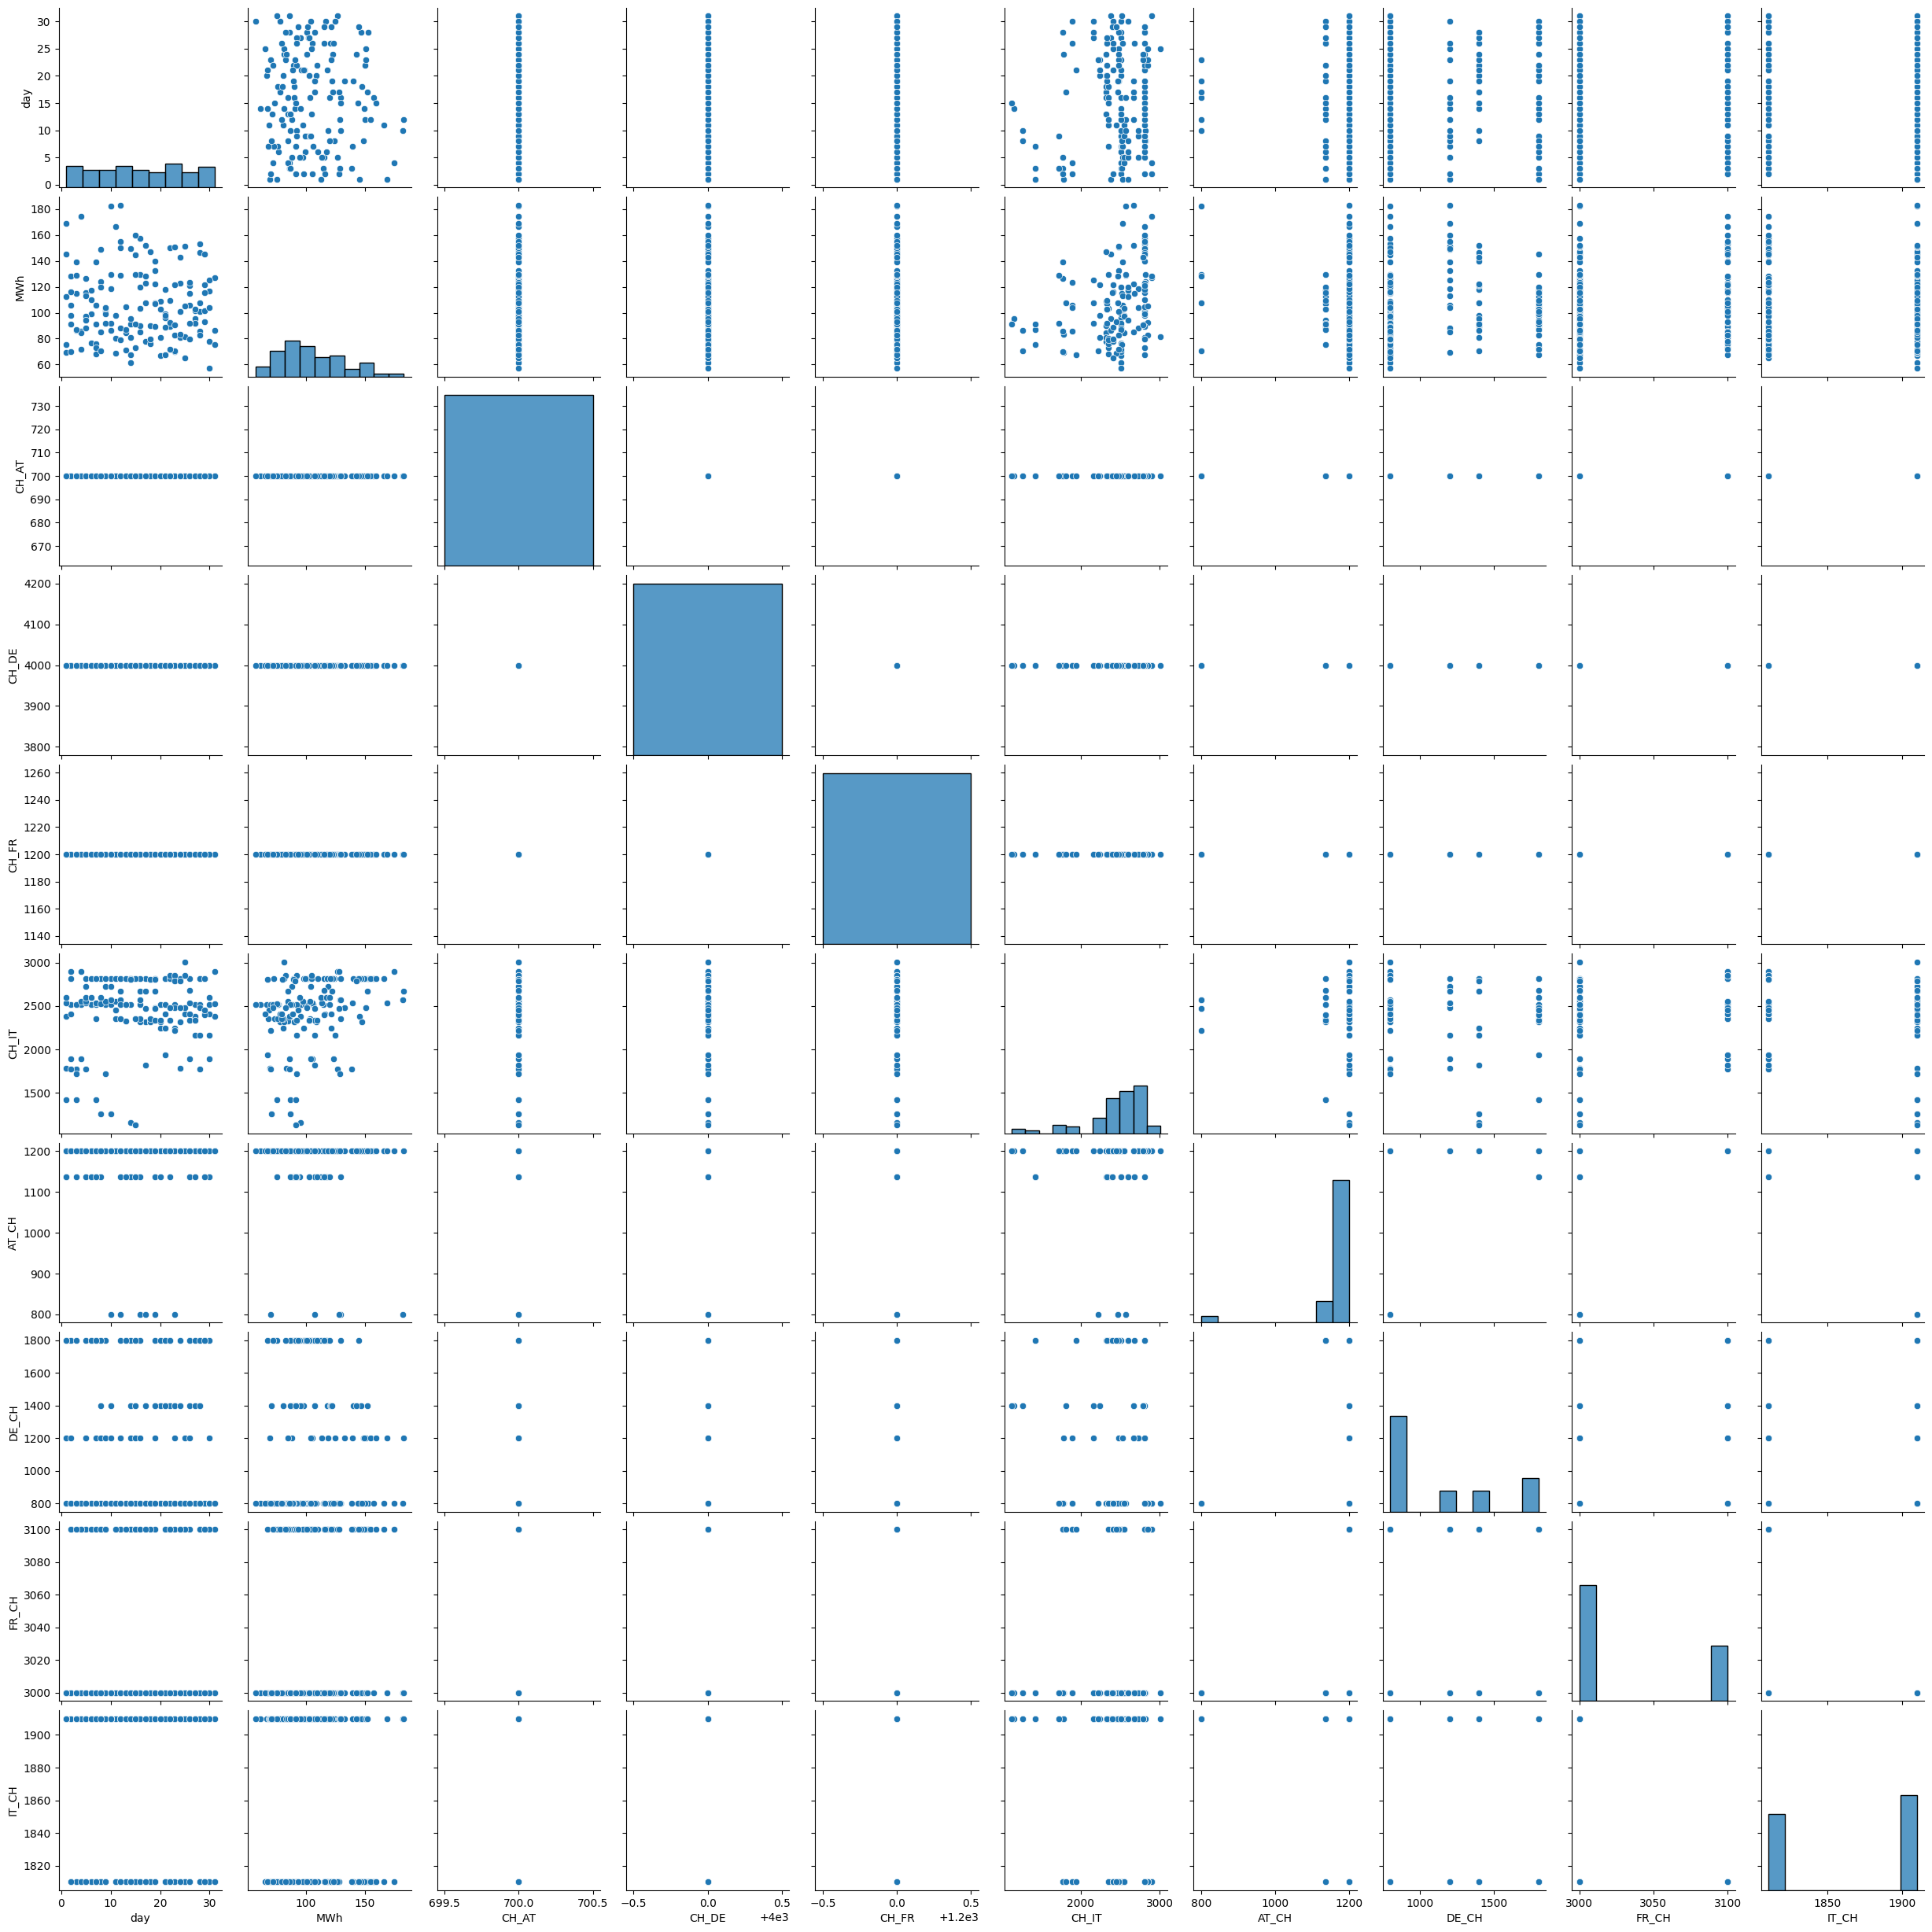

In [59]:
# Merge dataframes for Pairplot
df_merge = pd.merge(df_losses_group, df_ntc, left_index=True, right_index=True)


# Pairplot
sns.pairplot(df_merge)